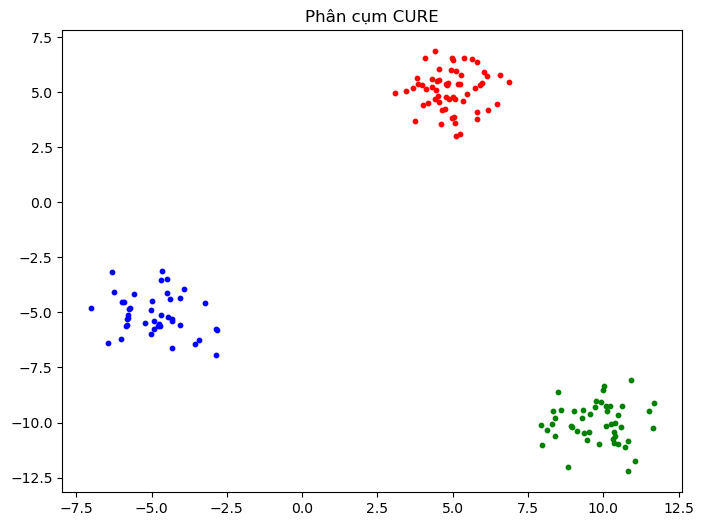

In [4]:
import numpy as np
from scipy.spatial.distance import cdist
import random
import matplotlib.pyplot as plt

# Lớp đại diện cho thuật toán CURE
class CURE:
    def __init__(self, n_clusters=2, n_representatives=5, shrink_factor=0.5):
        self.n_clusters = n_clusters               # Số cụm cần phân chia
        self.n_representatives = n_representatives # Số điểm đại diện cho mỗi cụm
        self.shrink_factor = shrink_factor         # Hệ số co các điểm về trung tâm

    def fit(self, X):
        # Khởi tạo các cụm, mỗi điểm ban đầu là một cụm riêng biệt
        clusters = [[x] for x in X]

        while len(clusters) > self.n_clusters:
            # Tính khoảng cách giữa tất cả các cụm
            distances = np.full((len(clusters), len(clusters)), np.inf)

            for i, cluster_i in enumerate(clusters):
                for j, cluster_j in enumerate(clusters):
                    if i != j:
                        # Khoảng cách giữa hai cụm là khoảng cách nhỏ nhất giữa hai điểm bất kỳ của hai cụm
                        distances[i, j] = np.min(cdist(cluster_i, cluster_j))

            # Tìm hai cụm gần nhất
            min_i, min_j = np.unravel_index(np.argmin(distances), distances.shape)

            # Gộp hai cụm gần nhất lại
            clusters[min_i] = clusters[min_i] + clusters[min_j]
            clusters.pop(min_j)

        # Chọn các điểm đại diện cho mỗi cụm
        self.representatives = []
        for cluster in clusters:
            # Chọn các điểm xa nhất từ tâm cụm làm điểm đại diện
            centroid = np.mean(cluster, axis=0)
            distances_to_centroid = cdist(cluster, [centroid])
            sorted_indices = np.argsort(distances_to_centroid.ravel())[::-1]
            representatives = [cluster[i] for i in sorted_indices[:self.n_representatives]]

            # Co các điểm đại diện về phía tâm cụm
            representatives = [(1 - self.shrink_factor) * rep + self.shrink_factor * centroid for rep in representatives]
            self.representatives.append(np.array(representatives))

    def predict(self, X):
        # Gán mỗi điểm dữ liệu mới vào cụm gần nhất dựa trên khoảng cách tới điểm đại diện
        predictions = []
        for point in X:
            min_distance = float('inf')
            cluster_idx = -1

            for i, representatives in enumerate(self.representatives):
                distance = np.min(cdist([point], representatives))
                if distance < min_distance:
                    min_distance = distance
                    cluster_idx = i

            predictions.append(cluster_idx)
        return predictions

# Kiểm thử thuật toán CURE với bộ dữ liệu mẫu
def generate_data(n_samples=100):
    np.random.seed(42)
    cluster_1 = np.random.randn(n_samples, 2) + np.array([5, 5])
    cluster_2 = np.random.randn(n_samples, 2) + np.array([-5, -5])
    cluster_3 = np.random.randn(n_samples, 2) + np.array([10, -10])
    X = np.vstack((cluster_1, cluster_2, cluster_3))
    idx = np.random.choice(len(X), size=int(0.5 * len(X)), replace=False)
    return X[idx]

# Tạo dữ liệu mẫu
X = generate_data()

# Khởi tạo và huấn luyện mô hình CURE
cure = CURE(n_clusters=3, n_representatives=5, shrink_factor=0.3)
cure.fit(X)

# Dự đoán cụm cho các điểm dữ liệu
predictions = cure.predict(X)

# Hiển thị kết quả
colors = ['red', 'green', 'blue', 'orange']
plt.figure(figsize=(8, 6))
for i, point in enumerate(X):
    plt.scatter(point[0], point[1], color=colors[predictions[i]], s=10)

plt.title('Phân cụm CURE')
plt.show()